In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# the second algorithem in the lecture note
kbt = 0.25
gamma = 10
m = 1
ens = 10000
delta = np.linspace(0, 20, 100)
deltat = 20/100
velocity = np.zeros((ens,len(delta)))
vth = np.sqrt((kbt)/m)
print(np.shape(velocity))
for j in range(ens):
    velocity[j,0] = 5*vth
    r = np.random.normal(0, 1, 1000)
    for i in range(len(delta) - 1):
        # r = np.random.normal(0, 0.5)
        c0 = np.exp(-gamma*deltat)
        velocity[j,i+1] = velocity[j,i]*c0 + vth*np.sqrt(1 - (c0*c0))*r[i]


(10000, 100)


In [59]:
# the first algorithem in the lecture note
kbt = 0.25
gamma = 1
m = 1
ens = 10000
steps = 1000
delta = np.linspace(0, 20, steps)
deltat = 20/steps
velocity = np.zeros((ens,len(delta)))
print(np.shape(velocity))
for j in range(ens):
    velocity[j,0] = 5
    r = np.random.normal(0, 1, steps)
    for i in range(len(delta) - 1):
        # r = np.random.normal(0, 1)
        velocity[j,i+1] = velocity[j,i]*(1-gamma*deltat) + np.sqrt(2*gamma*kbt*deltat/m)*r[i]


(10000, 1000)


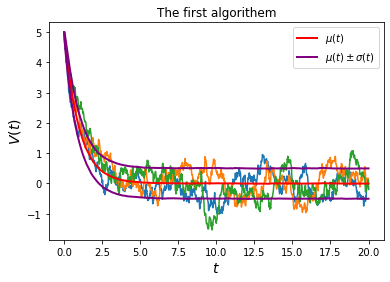

In [86]:
for i in range(3):
    plt.plot(delta, velocity[i,:])
plt.plot(delta, np.mean(velocity, axis = 0), label = r'$\mu(t)$', linewidth=2.0, color="red")
plt.plot(delta, np.mean(velocity, axis = 0) + np.std(velocity, axis = 0), label = r'$\mu(t) \pm \sigma(t)$'
         , linewidth=2.0, color="purple")
plt.plot(delta, np.mean(velocity, axis = 0) - np.std(velocity, axis = 0), linewidth=2.0, color="purple")
# plt.fill_between(xfit, yfit - dyfit, yfit + dyfit, color='gray', alpha=0.2)
plt.xlabel(r'$t$', fontsize = 14)
plt.ylabel(r'$V(t)$', fontsize = 14)
plt.title("The first algorithem")
plt.legend()
plt.savefig('Langevin.jpg')
plt.show()

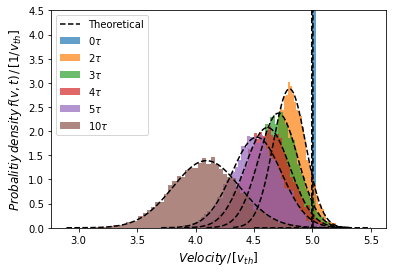

In [85]:
def ddf(x,j,sig):

    val = []  
    for i in x:
        if i==j:
            val.append(sig)
        else:
            val.append(0)
    return val

def f(v,t, kbt, gamma, v0, m):
    
    return np.sqrt(m/(2*np.pi*kbt*(1 - np.exp(-2*gamma*t))))* np.exp((-m*(v - (v0*np.exp(-gamma*t)))**2)/(2*kbt*(1 - np.exp(-2*gamma*t))))

tau0 = np.zeros(ens)
tau2 = np.zeros(ens)
tau3 = np.zeros(ens)
tau4 = np.zeros(ens)
tau5 = np.zeros(ens)
tau10 = np.zeros(ens)
for i in range(ens):
    tau0[i] = velocity[i,0]
    tau2[i] = velocity[i,2]
    tau3[i] = velocity[i,3]
    tau4[i] = velocity[i,4]
    tau5[i] = velocity[i,5]
    tau10[i] = velocity[i,10]


plt.hist(tau0, bins=30, alpha=0.7, label = r'$0 \tau$', density=True)
x = np.sort(np.append(np.linspace(4.5,5.5,100), [5]))
k = ddf(x,velocity[i,0],10000)
plt.plot(x, k, "k--", label = "Theoretical")


plt.hist(tau2, bins='auto', alpha=0.7, label = r'$2 \tau$', density=True)
ffunc2 = []
for i in tau2:
    ffunc2.append(f(i,delta[2], kbt, gamma, 5, m))

ffunc2 = np.array(ffunc2)
ffunc2 = ffunc2[tau2.argsort()]
newtau2 = np.sort(tau2)
plt.plot(newtau2,ffunc2, "k--")


plt.hist(tau3, bins='auto', alpha=0.7, label = r'$3 \tau$', density=True)
ffunc3 = []
for i in tau3:
    ffunc3.append(f(i,delta[3], kbt, gamma, 5, m))

ffunc3 = np.array(ffunc3)
ffunc3 = ffunc3[tau3.argsort()]
newtau3 = np.sort(tau3)
plt.plot(newtau3,ffunc3, "k--")


plt.hist(tau4, bins='auto', alpha=0.7, label = r'$4 \tau$', density=True)
ffunc4 = []
for i in tau4:
    ffunc4.append(f(i,delta[4], kbt, gamma, 5, m))

ffunc4 = np.array(ffunc4)
ffunc4 = ffunc4[tau4.argsort()]
newtau4 = np.sort(tau4)
plt.plot(newtau4, ffunc4, "k--")


plt.hist(tau5, bins='auto', alpha=0.7, label = r'$5 \tau$', density=True)
ffunc5 = []
for i in tau5:
    ffunc5.append(f(i,delta[5], kbt, gamma, 5, m))
ffunc5 = np.array(ffunc5)
ffunc5 = ffunc5[tau5.argsort()]
newtau5 = np.sort(tau5)
plt.plot(newtau5, ffunc5, "k--")


plt.hist(tau10, bins='auto', alpha=0.7, label = r'$10 \tau$', density=True)
ffunc10 = []
for i in tau10:
    ffunc10.append(f(i,delta[10], kbt, gamma, 5, m))
ffunc10 = np.array(ffunc10)
ffunc10 = ffunc10[tau10.argsort()]
newtau10 = np.sort(tau10)
plt.plot(newtau10, ffunc10, "k--")


plt.legend()
plt.ylim(0, 4.5)
plt.xlabel(r'$Velocity /\,[v_{th}]$', fontsize = 12)
plt.ylabel(r'$Probalitiy\,density\,f(v, t)\,/\,[1/v_{th}]$', fontsize = 12)

plt.savefig('foker-plank.jpg')
plt.show()